# Отток клиентов


Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — количество недвижимости у клиента
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a class="anchor" id="Подготовка_данных"></a>
# 1. Подготовка данных

Первичная подготовка данных
Оценка обьема данных
Оценка пропусков в данных

<a id="импорт_библиотек"></a>
### 1.1 Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
import warnings
import seaborn as sns
warnings.filterwarnings(action='once')


<a id="обработка_данных"></a>
### 1.2 Обработка данных

In [3]:
#загрузим данные
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Shad/07_babk/Churn.csv")

In [4]:
#проверим на пустые значени и типы данных.
data.isna().mean()

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0



Обработка:

  * Убрать заглавные символы в названиях признаков, удалить не нужные признаки. "Surname".
   
  * Тип данных признака Tenure заменить на int
  
  * На первом круге будем обучать модель на полных данных, поэтому сформируем датасет без пустых значений. Заполним пустые значения медианой.
  
  
    
    

In [7]:
# Приведем названия признаков к нижнему регистру
data.columns = data.columns.str.lower()

In [8]:
data['tenure'].median()

5.0

In [9]:
data['tenure'].mean()

4.997690023099769

In [10]:
data['tenure'].fillna(data['tenure'].median(),inplace=True)


In [11]:
data['exited'].mean()

0.2037

In [12]:
# заменим тип данных tenure на int 
data['tenure'] = data['tenure'].astype('int64',errors='ignore') 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
#data = data.fillna('unknown')

In [15]:
#data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
data.corr()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1.000000,0.004202,0.005840,0.000783,-0.006979,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
customerid,0.004202,1.000000,0.005308,0.009497,-0.020331,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
creditscore,0.005840,0.005308,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.000783,0.009497,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.006979,-0.020331,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,0.010049,-0.015989
balance,-0.009067,-0.012419,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.007246,0.016972,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,0.000599,-0.014025,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.012044,0.001665,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.005988,0.015271,-0.001384,-0.007201,0.010049,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Итог
Проведена первичная обработка полученных данных. 

<a class="anchor" id="исследование_задачи"></a>
# 2. Исследование задачи

### 2.1 Постановка задачи


Цель - прогнозирование, уйдёт клиент из банка в ближайшее время или нет. 

Задача является категориальной. Будем применять модели классификации, 1 - клиент уйдет 0 - клиента отсанется. 

Лучшим показателем работы модели будут положительные предсказания, так как нам в первую очередь интересны клиенты, которые могут покинуть нас в ближайшее время.

Основным критерием оценки работы модели будет F-Мера (F1-score), так же дополнительно для предтсавления о работе модели использовать метрики AUC-ROC для построения криво

Будем использовать 3 модели, линейную регрессию,решающее дерево и случайный лес.


### План работ
- [x] Проверить целевой признак на дисбаланс
- [x] Отобрать признаки, проверить корреляцию признаков, преобразовать   
- [x] Сформировать наборы данных тренировочный, валидационный и тестовый
- [x] Провести преобразование категориальных признаков
- [x] Выбрать подходящую модель для обучения
- [x] Обучить модель подобрать гипер параметры проверить результат на валидационном наборе
- [x] Оценить необходимость маштабирования признаков
- [ ] Вывод 



<a id="обработка"></a>
### 2.2 Обработка признаков

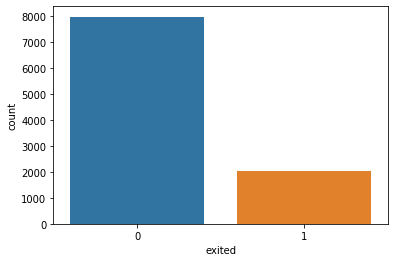

In [18]:
#Посмотрим на целевоц признак
sns.countplot(data = data, x = 'exited')

In [19]:
data['exited'].mean()

0.2037

Доля положительных ответов в представленном дадтасете  составляет всего 20%, это может сказаться на результатах модели. Вероятнее всего модель будет реже относить данные к положительному классу.


In [20]:
#Удалим лишние призанки
data = data.drop(['rownumber','customerid','surname'],axis=1)

In [21]:
#Для обоучения моделей проведем прямое кодирование категориальных признаков
data = pd.get_dummies(data, drop_first=True)

In [22]:
data

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<a id="обработка"></a>
### 2.3 Формирование наборов данных 

In [23]:
# Из полученного датасета сформируем три набора данных, тренировочный, валидационный и тестовый 70/15/15

x = data.drop(['exited'],axis=1)
y = data['exited']

In [24]:
x_train, x_remainder, y_train, y_remainder = train_test_split(x, y, test_size=0.4, random_state=12345)
#Разделим оставшиеся данные на валидационнцю и тестовую наборы
x_valid, x_test, y_valid, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, random_state=12345)

In [25]:
#Проверим разбивку
print('Общий размер датасета:',len(x))
print('Размер валидационного набора:',len(x_valid),len(y_valid))
print('Размер тестового набора',len(x_test),len(y_test))
print("Размер тренировочного  набора:",len(x_train),len(y_train))
print("Сумма всех нразбивок:",len(x_valid)+len(x_test)+len(x_train))

Общий размер датасета: 10000
Размер валидационного набора: 2000 2000
Размер тестового набора 2000 2000
Размер тренировочного  набора: 6000 6000
Сумма всех нразбивок: 10000


In [26]:
# Для модели линейная регрессия сделаем дополнительный датасет, 
# и сделаем масшабирование признаков creditscore,age,balance,estimatedsalary
numeric = ['creditscore','age','balance','estimatedsalary']
scaler = StandardScaler()

scaler.fit(x_train[numeric])
x_train_scale = x_train.copy()
x_valid_scale = x_valid.copy()       

x_train_scale[numeric] = scaler.transform(x_train_scale[numeric])
x_valid_scale[numeric] = scaler.transform(x_valid_scale[numeric])

In [27]:
x_train_scale

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,8,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,8,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,3,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,6,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,2,1.140475,1,0,0,1.524268,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,-1.073677,-0.752805,4,-1.233163,2,0,1,-1.278361,0,0,1
4094,-1.447531,-0.942612,10,-1.233163,2,0,1,-1.281307,0,0,1
3492,0.027113,0.575842,5,-0.310229,1,0,1,-0.903158,0,0,0
2177,0.151731,-1.417129,4,-1.233163,2,0,1,-1.128539,0,0,0


In [28]:
x_valid_scale

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
8532,-0.699824,-0.373192,2,-1.233163,2,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,3,-1.233163,1,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,0,0.438711,1,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,10,1.239884,1,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,10,-1.233163,2,1,0,1.358533,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6480,0.276349,-1.417129,6,0.617449,2,0,1,0.628182,0,0,0
8194,-0.211738,0.291132,4,0.797229,1,1,0,0.026002,0,0,1
1279,-1.364452,0.006422,6,-1.233163,2,0,1,-1.249087,0,0,0
6532,1.075979,2.663716,4,-1.233163,3,1,1,-0.111107,0,0,1


In [29]:
x_train

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
7479,567,35,8,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2,147435.96,1,0,0,187508.06,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,549,31,4,0.00,2,0,1,25684.85,0,0,1
4094,513,29,10,0.00,2,0,1,25514.77,0,0,1
3492,655,45,5,57327.04,1,0,1,47349.00,0,0,0
2177,667,24,4,0.00,2,0,1,34335.55,0,0,0


In [30]:
x_valid

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
8532,585,35,2,0.00,2,1,0,98621.04,0,0,0
5799,625,45,3,0.00,1,1,1,184474.15,0,0,0
5511,667,32,0,103846.65,1,1,0,20560.69,1,0,1
7365,568,36,10,153610.61,1,1,1,54083.80,0,1,0
7367,606,42,10,0.00,2,1,0,177938.52,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6480,679,24,6,114948.76,2,0,1,135768.25,0,0,0
8194,632,42,4,126115.60,1,1,0,100998.50,0,0,1
1279,521,39,6,0.00,2,0,1,27375.15,0,0,0
6532,756,67,4,0.00,3,1,1,93081.87,0,0,1


In [31]:
# Создадим дадасет в который будем записывать все показатели моделей.
columns=['model_name','roc_auc_scores','recall_scores','precision_scores','f1_scores','tn','fp','fn','tp']
result_metric = pd.DataFrame(columns=columns)

In [32]:
result_metric

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp


In [33]:
#перед обучением сделаем функцию сбора метрик 
def metrics_model(model_name,y_valids,predictions,probabilites_one):
    global result_metric
    #roc_auc_scores =0
    roc_auc_scores = roc_auc_score(y_valids, probabilites_one)
    
    #recall_scores=0
    recall_scores = recall_score(y_valids, predictions)
    
    #precision_scores=0
    precision_scores = precision_score(y_valids, predictions)
    
    #f1_scores=0
    f1_scores = f1_score(y_valids, predictions)
    
    tn, fp, fn, tp = confusion_matrix(y_valids, predictions).ravel()
    
    result = ({'model_name':model_name,'roc_auc_scores':roc_auc_scores,
                         'recall_scores':recall_scores,'precision_scores':precision_scores,'f1_scores':f1_scores,
                          'tn':tn,'fp':fp,'fn':fn,'tp':tp})
    return result

In [34]:
def figure():
    f, ax = plt.subplots(figsize=(6,6))
    
    #plt.axhspan(0,1,0,1,color='#d62728')
    ax.plot([0, 1], [0, 1], ls="--",color='#d62728')
    return ax

In [35]:
#Функция отрисовки
def roc (y_valid,probabilites_one,name,axis):
   
    fpr, tpr, thresholds = roc_curve(y_valid, probabilites_one)
    roc_auc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresholds':thresholds})
    roc_auc['fpr_i'] = roc_auc['fpr']
    
    fig = plt.figure()
    
    roc_auc.plot(x='fpr',y='tpr',ax=axis,label=name,grid=True)

Данны подготовлены, сформированны все необходимые наборы. 

<a id="линейная"></a>
### 2.4 Обучение логистической регрессии

In [36]:
#обучим и проверим логичтическую регрессию на простом датасете
lr = LogisticRegression(solver='liblinear',random_state=12345)
lr.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [37]:
#обучим и проверим логичтическую регрессию на  датасете с маштабированием
lr_scale = LogisticRegression(solver='liblinear',random_state=12345)
lr_scale.fit(x_train_scale,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [38]:
#Проверим модель на валидационном наборе  и на наборе с маштабирование
predicted_lr_valid = lr.predict(x_valid)

In [39]:
predicted_lr_scale_valid = lr_scale.predict(x_valid_scale)

In [40]:
probabilites_lr_one = lr.predict_proba(x_valid)[:,1]

In [41]:
probabilites_lr_one_scale = lr_scale.predict_proba(x_valid_scale)[:,1]

In [42]:
result_metric=result_metric.append(metrics_model('lr',
              y_valid,predicted_lr_valid,
              probabilites_lr_one),ignore_index=True)

In [43]:
result_metric=result_metric.append(metrics_model('lr_scale',
                                   y_valid,predicted_lr_scale_valid,
                                   probabilites_lr_one_scale),ignore_index=True)

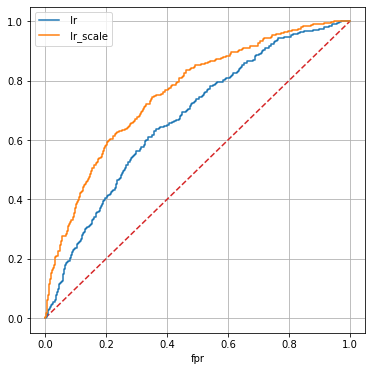

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [44]:
ax = figure()
roc(y_valid,probabilites_lr_one,' lr',ax)
roc(y_valid,probabilites_lr_one_scale," lr_scale",ax)

#### Промежуточный итог для линейной регрессии:

Линейная регрессия:

Полученные результаты ,после обучение и проверки данной модели на двух датасетах с мастабированием и без, оказались недостаточными для решения поставленной задачи. 

Матрица ошибок показала, что модель слабо распознает положительные ответ из-за этого recall очень мал.

Показатель ROC AUC всго 0,75 до идеального слишком далеко, врятли получится сильно увеличить его. Целевой показатель тоже очень мал.

Данную модель для решения задачи далее рассматривать не будем


<a id="лес"></a>
### 2. 5 Модель "Случайный лес"

Модель случайный лес будем обучать на обчном датасете, без масштабирования.



In [45]:
warnings.filterwarnings('ignore')
# подберем оптимальные гиперпараметры для модели
best_score = 0
max_est = 0
max_depth = 0
for est in range(1,100,5):
    for depth in range(1,100,5):
        
        clf = RandomForestClassifier(n_estimators=est, max_depth=depth,random_state=12345)
        clf.fit(x_train,y_train)
        predicted = clf.predict(x_valid)
        res_score = f1_score(y_valid,predicted)
    
        if best_score < res_score:
            best_score = res_score
            max_est = est
            max_depth = depth
   
print('гиперпараметры')   
print("n_estimators:",max_est,'max_depth', max_depth, 'f1',best_score) 

гиперпараметры
n_estimators: 81 max_depth 21 f1 0.5898203592814371


In [46]:
#Проверим модель
clf = RandomForestClassifier(n_estimators=max_est, max_depth=max_depth,random_state=12345)

In [47]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=21, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=81,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [48]:
#Полчим прогноз модели 
predicted_clf_valid = clf.predict(x_valid)

In [49]:
#Вероятность 
probabilites_clf_one = clf.predict_proba(x_valid)[:,1]

In [50]:
result_metric=result_metric.append(metrics_model('clf',y_valid, predicted_clf_valid,
                          probabilites_clf_one),ignore_index=True)

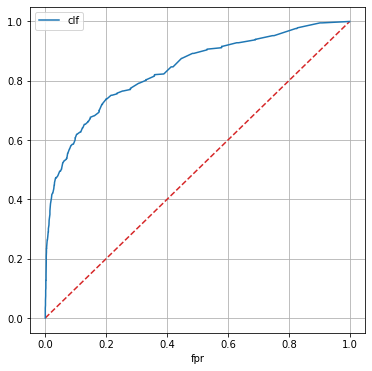

<Figure size 432x288 with 0 Axes>

In [51]:
ax = figure()
roc(y_valid,probabilites_clf_one,"clf",ax)

In [52]:
result_metric

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp
0,lr,0.672795,0.047847,0.338983,0.083857,1543,39,398,20
1,lr_scale,0.758735,0.234450,0.563218,0.331081,1506,76,320,98
2,clf,0.836262,0.471292,0.788000,0.589820,1529,53,221,197


#### Промежуточный итог для модели Случайный лес
Модель "решающее дерево"  работает хорошо. результы данной модели на валидационной выборке соответсвуют минимальным требованиям.


Показатель roc_auc_score говорит что модель существенно чем простой рандом.

У модели решающего дерева  хорошая точностью, но полноту необходимо увеличить.

Модель хорошо определяет тех клиентов кто останется. Но еще плохо распознает  тех кто уйдет, вероятно потому как  мало событий положительного класса. 
С текущим показателей данную модель можно донастроить на сбалансированном датасете.



<a id="дерево"></a>
### 2.5 Решающее дерево

In [53]:
warnings.filterwarnings('ignore')
best_score = 0
max_depth = 0
for depht in range(1,100,5):
    tree = DecisionTreeClassifier(max_depth=depht,random_state=12345)
    tree.fit(x_train,y_train)
    predicted_tree = tree.predict(x_valid)
    
    res_score = f1_score(y_valid,predicted_tree)
    
    if best_score < res_score:
        best_score = res_score
        max_depth = depht
       
print('гиперпараметры')            
print("max_depth:",max_depth, 'f1-score',best_score)

гиперпараметры
max_depth: 6 f1-score 0.5696969696969697


In [54]:
tree = DecisionTreeClassifier(max_depth=max_depth,random_state=12345)

In [55]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [56]:
predicted_tree_valid = tree.predict(x_valid)

In [57]:
probabilites_tree_one = tree.predict_proba(x_valid)[:,1]

In [58]:
result_metric=result_metric.append(metrics_model('tree', 
              y_valid, predicted_tree_valid,
              probabilites_tree_one),ignore_index=True)

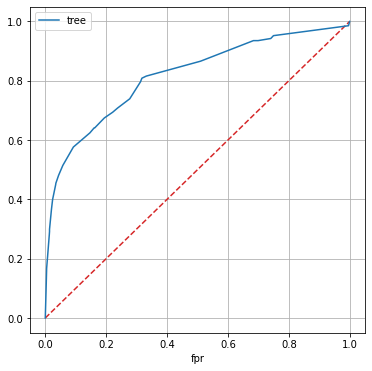

<Figure size 432x288 with 0 Axes>

In [59]:
ax = figure()
roc(y_valid,probabilites_tree_one,'tree',ax)

In [60]:
result_metric

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp
0,lr,0.672795,0.047847,0.338983,0.083857,1543,39,398,20
1,lr_scale,0.758735,0.234450,0.563218,0.331081,1506,76,320,98
2,clf,0.836262,0.471292,0.788000,0.589820,1529,53,221,197
3,tree,0.816463,0.449761,0.776860,0.569697,1528,54,230,188


<a id="Итог1"></a>
## 2. 7 Итог

Проведено обучение трех моделей на разных датасетах, с маштабированием признаков и без. Выделим  топ модели по целевому для нашей задачи показателю в порядке убывания 

1. "Решающее дерево" - модель обучена на датасете без масштабирования 
    
  **F1-Мера = 0,59**


2. "Случайный лес" - модель обученная на датасете без масштабирования.

  **F1-Мера = 0,56**
 

Все обученные модели дают много ложноотрицательных ответов. Для решения данной проблемы попробуем изменить баланс классов вручную. После оценки при необходимости переобучим модели с параметром **class_weight**.





# 3. Борьба с дисбалансом

<a id="балансировка"></a>
### 3.1 Подготовка нового набора 


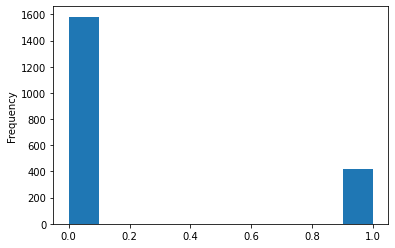

In [61]:
y_valid.plot(kind='hist')

In [62]:
def upsample(x, y, repeat):
    x_zeros = x[y == 0]
    x_ones = x[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    x_upsampled = pd.concat([x_zeros] + [x_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    x_upsampled, y_upsampled = shuffle(
        x_upsampled, y_upsampled, random_state=12345)
    
    return x_upsampled, y_upsampled

In [63]:
x_upsampled, y_upsampled = upsample(x_train, y_train, 2)

In [64]:
y_upsampled.mean()

0.33240689271817675

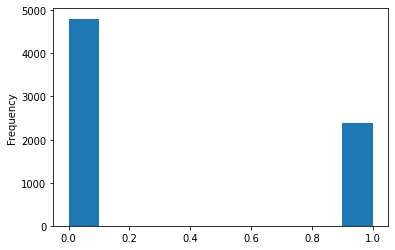

In [65]:
y_upsampled.plot(kind='hist')

<a id="Дерево_баланс"></a>
###  3.3 "Решающее дерево"

In [66]:
#Перед тем как обучить модель, вернемя и подберем новые параметры для обучения

In [67]:
warnings.filterwarnings('ignore')
#Подберем новые параметры для модели на новом датасете
best_score = 0
max_depth = 0
for depht in range(1,100,5):
    tree = DecisionTreeClassifier(max_depth=depht,random_state=12345)
    tree.fit(x_upsampled,y_upsampled)
    predicted = tree.predict(x_valid)
    res_score = f1_score(y_valid,predicted)
    if best_score < res_score:
        best_score = res_score
        max_depth = depht
            
print("Глубина дерева:",max_depth, 'F1-мера',best_score)   

Глубина дерева: 6 F1-мера 0.5977961432506886


In [68]:
tree = DecisionTreeClassifier(max_depth=max_depth,random_state=12345)
tree.fit(x_upsampled,y_upsampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [69]:
predicted_tree_valid = tree.predict(x_valid)

In [70]:
probabilites_tree_one = tree.predict_proba(x_valid)[:,1]

In [71]:
result_metric=result_metric.append(metrics_model('tree_balanced',
                                   y_valid, 
                                   predicted_tree_valid, 
                                   probabilites_tree_one),ignore_index=True)

In [72]:

result_metric

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp
0,lr,0.672795,0.047847,0.338983,0.083857,1543,39,398,20
1,lr_scale,0.758735,0.234450,0.563218,0.331081,1506,76,320,98
2,clf,0.836262,0.471292,0.788000,0.589820,1529,53,221,197
3,tree,0.816463,0.449761,0.776860,0.569697,1528,54,230,188
4,tree_balanced,0.821057,0.519139,0.704545,0.597796,1491,91,201,217


<a id="Лес_баланс"></a>
###  3.3 "Случайный лес" 

In [73]:
warnings.filterwarnings('ignore')
# Теперь подберем кол-во деревьев
best_score = 0
max_est = 0
max_depth = 0
for est in range(1,100,5):
    for depth in range(1,100,5):
        
        clf = RandomForestClassifier(n_estimators=est, max_depth=depth,random_state=12345)
        clf.fit(x_upsampled,y_upsampled)
        predicted = clf.predict(x_valid)
        res_score = f1_score(y_valid,predicted)
    
        if best_score < res_score:
            best_score = res_score
            max_est = est
            max_depth = depth
print('гиперпараметры')   
print("n_estimators:",max_est,'max_depth', max_depth, 'f1',best_score) 

гиперпараметры
n_estimators: 91 max_depth 11 f1 0.625503355704698


In [74]:
clf = RandomForestClassifier(n_estimators=max_est, max_depth=max_depth,random_state=12345)
clf.fit(x_upsampled,y_upsampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=91,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [75]:
predicted_clf_valid = clf.predict(x_valid)

In [76]:
probabilites_clf_one = clf.predict_proba(x_valid)[:,1]

In [77]:
result_metric=result_metric.append(metrics_model('clf_balanced',
                                                 y_valid, predicted_clf_valid,
                                                 probabilites_clf_one),ignore_index=True)

In [78]:
result_metric

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp
0,lr,0.672795,0.047847,0.338983,0.083857,1543,39,398,20
1,lr_scale,0.758735,0.234450,0.563218,0.331081,1506,76,320,98
2,clf,0.836262,0.471292,0.788000,0.589820,1529,53,221,197
3,tree,0.816463,0.449761,0.776860,0.569697,1528,54,230,188
4,tree_balanced,0.821057,0.519139,0.704545,0.597796,1491,91,201,217
5,clf_balanced,0.849533,0.557416,0.712538,0.625503,1488,94,185,233


Модель "Случайны лес" показала очень хорошие результаты, на текущем уровне модель отвечает качеству по нашему целевому признаку
Для модели "решающее дерево" после балансировки классов тоже удалось увеличить показатели.
Попробуем еще один способ обучим модель на тренеровочной выборке, но  с параметром class_weight='balanced' и проверим результат.

In [79]:
#Перед тем как обучить модель, подберем новые параметры для обучения
#с учетом параметра class_weight

In [80]:
best_score = 0
max_depth = 0
for depht in range(1,100,5):
    tree = DecisionTreeClassifier(max_depth=depht,random_state=12345,class_weight='balanced')
    tree.fit(x_train,y_train)
    predicted = tree.predict(x_valid)
    res_score = f1_score(y_valid,predicted)
    if best_score < res_score:
        best_score = res_score
        max_depth = depht
            
print("Глубина дерева:",max_depth, 'Accuracy',best_score) 

Глубина дерева: 6 Accuracy 0.5581835383159887


In [81]:
tree = tree = DecisionTreeClassifier(max_depth=max_depth,
                                    random_state=12345,class_weight='balanced')


In [82]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [83]:
predicted_tree_valid = tree.predict(x_valid)

In [84]:
probabilites_tree_one = tree.predict_proba(x_valid)[:,1]

In [85]:
result_metric=result_metric.append(metrics_model('tree_class_weight', 
                                                 y_valid, 
                                                 predicted_tree_valid, 
                                                 probabilites_tree_one),ignore_index=True)

In [86]:
result_metric.sort_values(by='f1_scores')

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp
0,lr,0.672795,0.047847,0.338983,0.083857,1543,39,398,20
1,lr_scale,0.758735,0.234450,0.563218,0.331081,1506,76,320,98
6,tree_class_weight,0.799947,0.705742,0.461659,0.558184,1238,344,123,295
3,tree,0.816463,0.449761,0.776860,0.569697,1528,54,230,188
2,clf,0.836262,0.471292,0.788000,0.589820,1529,53,221,197
4,tree_balanced,0.821057,0.519139,0.704545,0.597796,1491,91,201,217
5,clf_balanced,0.849533,0.557416,0.712538,0.625503,1488,94,185,233


### Итог

После ручной и автоматической балансировки классов, f1-мера повысилась. Нам удалось повысить показатель полноты для обеих моделй, но и доля ложноположительных ответов увеличилась. 

Попробуем изменить пороговые значения и посмотрим на показатели полноты и точности моделей.


Лучший результат  у модели "Случайный лес".

Для модели "решающее дерево", будем использовать параметры полученные при обучении на сбалансированном вручную датасете 

<a id="порог_лес"></a>
### Порог для случайного леса

In [87]:
probabilites_clf_one

array([0.02810312, 0.43324294, 0.33460197, ..., 0.1076442 , 0.5970696 ,
       0.87969833])

In [88]:
f1_best = 0
thresh = 0
prec = 0
rec = 0
for threshold in np.arange(0.3, 0.8, 0.02):
    predictions = (probabilites_clf_one>threshold)*1
    #recall_scores=0
    recall = recall_score(y_valid, predictions)
    f1 = f1_score(y_valid,predictions)
    #precision_scores=0
    precision = precision_score(y_valid, predictions)
    
    if f1 > f1_best:
        f1_best = f1
        thresh = threshold
        prec = precision
        rec = recall
            
print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1-мера = {:.3f}".format(
                                                thresh, prec, rec ,f1_best))

Порог = 0.38 | Точность = 0.586, Полнота = 0.679, f1-мера = 0.629


In [89]:
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=91,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [90]:
probabilites_clf = clf.predict_proba(x_valid)

In [91]:
predicted_clf_valid = (probabilites_clf[:,1] > 0.46)*1

In [92]:
f1_score(y_valid,predicted_clf_valid)

0.6223337515683814

In [93]:
result_metric=result_metric.append(metrics_model('clf_final',
                                                 y_valid, 
                                                 predicted_clf_valid,
                                                 probabilites_clf[:,1]),ignore_index=True)

In [94]:
result_metric

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp
0,lr,0.672795,0.047847,0.338983,0.083857,1543,39,398,20
1,lr_scale,0.758735,0.234450,0.563218,0.331081,1506,76,320,98
2,clf,0.836262,0.471292,0.788000,0.589820,1529,53,221,197
3,tree,0.816463,0.449761,0.776860,0.569697,1528,54,230,188
4,tree_balanced,0.821057,0.519139,0.704545,0.597796,1491,91,201,217
5,clf_balanced,0.849533,0.557416,0.712538,0.625503,1488,94,185,233
6,tree_class_weight,0.799947,0.705742,0.461659,0.558184,1238,344,123,295
7,clf_final,0.849533,0.593301,0.654354,0.622334,1451,131,170,248


<a id="порог_дерево"></a>
### Порог для решающего дерева

In [95]:
tree = DecisionTreeClassifier(max_depth=6,random_state=12345)
tree.fit(x_upsampled,y_upsampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [96]:
probabilites_tree_one = tree.predict_proba(x_valid)[:,1]

In [97]:
probabilites_tree_one

array([0.02819237, 0.57553957, 0.41269841, ..., 0.02819237, 0.        ,
       0.9122807 ])

In [98]:
f1_best = 0
thresh = 0
prec = 0
rec = 0
for threshold in np.arange(0.3, 0.8, 0.02):
    predictions = (probabilites_tree_one>threshold)*1
    #recall_scores=0
    recall = recall_score(y_valid, predictions)
    f1 = f1_score(y_valid,predictions)
    #precision_scores=0
    precision = precision_score(y_valid, predictions)
    
    if f1 > f1_best:
        f1_best = f1
        thresh = threshold
        prec = precision
        rec = recall
            
print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1-мера = {:.3f}".format(
                                                thresh, prec, rec ,f1_best))

Порог = 0.44 | Точность = 0.625, Полнота = 0.581, f1-мера = 0.602


In [99]:
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [100]:
probabilites_tree = tree.predict_proba(x_valid)

In [101]:
predict_tree_valid = (probabilites_tree[:,1] > thresh)*1

In [102]:
f1_score(y_valid,predict_tree_valid)

0.6022304832713755

In [103]:
result_metric=result_metric.append(metrics_model('tree_final',
                                                 y_valid, predict_tree_valid,
                                                 probabilites_tree[:,1]),ignore_index=True)

In [104]:
result_metric

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp
0,lr,0.672795,0.047847,0.338983,0.083857,1543,39,398,20
1,lr_scale,0.758735,0.234450,0.563218,0.331081,1506,76,320,98
2,clf,0.836262,0.471292,0.788000,0.589820,1529,53,221,197
3,tree,0.816463,0.449761,0.776860,0.569697,1528,54,230,188
4,tree_balanced,0.821057,0.519139,0.704545,0.597796,1491,91,201,217
5,clf_balanced,0.849533,0.557416,0.712538,0.625503,1488,94,185,233
6,tree_class_weight,0.799947,0.705742,0.461659,0.558184,1238,344,123,295
7,clf_final,0.849533,0.593301,0.654354,0.622334,1451,131,170,248
8,tree_final,0.821057,0.581340,0.624679,0.602230,1436,146,175,243


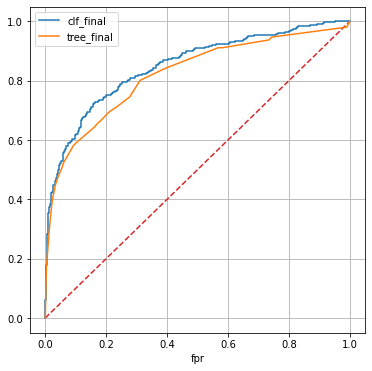

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [105]:
ax = figure()
roc(y_valid,probabilites_clf[:,1],'clf_final',ax)
roc(y_valid,probabilites_tree[:,1],'tree_final',ax)

Изменив порог для двух моделей, мы еще немного смогли поднять целевой показатель. Таким образром после проверки на валидационной выборке, обе модели отвечают целевым показателям и можно оценить их работу на тестовой выборке.



# 4. Тестирование модели

In [106]:
# Обьеденим валидационну выборку и тестову для обучения модели перед тестированием
x_final_train = pd.concat([x_upsampled] + [x_valid])
                        

In [107]:
y_final_train = pd.concat([y_upsampled] + [y_valid])

In [108]:
x_final_train, y_final_train = shuffle(
        x_final_train, y_final_train, random_state=12345)

In [109]:
len(x_final_train)

9196

In [110]:
len(y_final_train)

9196

### Случайный лес

In [111]:
clf = RandomForestClassifier(n_estimators=91, max_depth=11,random_state=12345)
clf.fit(x_final_train,y_final_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=91,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [112]:
probabilites_clf = clf.predict_proba(x_test)

In [113]:
predicted_clf_test = (probabilites_clf[:,1] > 0.46)*1

In [114]:
f1_score(y_test,predicted_clf_test)

0.6119791666666666

In [115]:
result_metric=result_metric.append(metrics_model('clf_test',
                                                 y_test, 
                                                 predicted_clf_test,
                                                 probabilites_clf[:,1]),ignore_index=True)

### Решающее дерево

In [116]:
tree = DecisionTreeClassifier(max_depth=6,random_state=12345)
tree.fit(x_final_train,y_final_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [117]:
probabilites_tree = tree.predict_proba(x_test)

In [118]:
predict_tree_test = (probabilites_tree[:,1] > 0.44)*1

In [119]:
f1_score(y_test,predict_tree_test)

0.5997521685254028

In [120]:
result_metric=result_metric.append(metrics_model('tree_test',
                                                 y_test, predict_tree_test,
                                                 probabilites_tree[:,1]),ignore_index=True)

In [121]:
result_metric

,model_name,roc_auc_scores,recall_scores,precision_scores,f1_scores,tn,fp,fn,tp
0,lr,0.672795,0.047847,0.338983,0.083857,1543,39,398,20
1,lr_scale,0.758735,0.234450,0.563218,0.331081,1506,76,320,98
2,clf,0.836262,0.471292,0.788000,0.589820,1529,53,221,197
3,tree,0.816463,0.449761,0.776860,0.569697,1528,54,230,188
4,tree_balanced,0.821057,0.519139,0.704545,0.597796,1491,91,201,217
5,clf_balanced,0.849533,0.557416,0.712538,0.625503,1488,94,185,233
6,tree_class_weight,0.799947,0.705742,0.461659,0.558184,1238,344,123,295
7,clf_final,0.849533,0.593301,0.654354,0.622334,1451,131,170,248
8,tree_final,0.821057,0.581340,0.624679,0.602230,1436,146,175,243
9,clf_test,0.861282,0.555556,0.681159,0.611979,1467,110,188,235


<a class="anchor" id="21-bullet">

#### Итог 
Мы получили нужный целевой показатель метрики на моделях  "случаный лес"и "решающее дерево"

Целевой метрики на тестовой выборке удалось достич применяя следующие методы и практики.

* Прямое кодирование признаков
* Балансировка классов, путем анализа результатов можели положительный класс в обучающей выборку был увеличен вдвое.
* Обучение модели с параметром class, для модели решающее дерево, балансировка классов недала улучшений, пожтому был применен параметр class
* Анализ и изменение порога. Для обоих моделей был изменен стандартный порог, что позволило увеличить целевую метрику.
